In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## MNIST CNN 

In [2]:
from fastai.vision import *

## Data

In [9]:
path = untar_data(URLs.MNIST, "mnsit_png", "/home/ricky/Desktop/repos/fastai_course/data")

In [10]:
path.ls()

[PosixPath('/home/ricky/Desktop/repos/fastai_course/data/mnist_png/training'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/mnist_png/testing')]

In [11]:
il = ImageList.from_folder(path, convert_mode="L")

In [15]:
il.items[0]

PosixPath('/home/ricky/Desktop/repos/fastai_course/data/mnist_png/training/5/8504.png')

In [16]:
defaults.cmap = "binary"

In [17]:
il

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/ricky/Desktop/repos/fastai_course/data/mnist_png

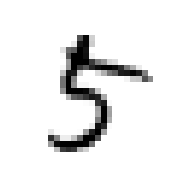

In [22]:
il[0].show()

In [23]:
sd = il.split_by_folder(train="training", valid="testing")

In [24]:
sd

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/ricky/Desktop/repos/fastai_course/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/ricky/Desktop/repos/fastai_course/data/mnist_png;

Test: None

In [30]:
(path/"training").ls()

[PosixPath('/home/ricky/Desktop/repos/fastai_course/data/mnist_png/training/5'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/mnist_png/training/7'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/mnist_png/training/1'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/mnist_png/training/0'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/mnist_png/training/8'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/mnist_png/training/6'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/mnist_png/training/4'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/mnist_png/training/9'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/mnist_png/training/3'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/mnist_png/training/2')]

In [25]:
ll = sd.label_from_folder()

In [26]:
ll

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
5,5,5,5,5
Path: /home/ricky/Desktop/repos/fastai_course/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
5,5,5,5,5
Path: /home/ricky/Desktop/repos/fastai_course/data/mnist_png;

Test: None

In [28]:
x, y = ll.train[0]

5 torch.Size([1, 28, 28])


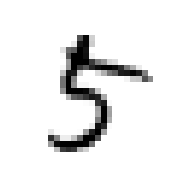

In [29]:
x.show()
print(y, x.shape)

In [31]:
tfms = ([*rand_pad(padding=3, size=28, mode="zeros")], [])

In [35]:
tfms, len(tfms[0])

(([RandTransform(tfm=TfmPixel (pad), kwargs={'padding': 3, 'mode': 'zeros'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
   RandTransform(tfm=TfmPixel (crop), kwargs={'size': 28, 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)],
  []),
 2)

In [36]:
ll = ll.transform(tfms)

In [37]:
bs = 128

In [38]:
data = ll.databunch(bs=bs).normalize()

In [39]:
x,y = data.train_ds[0]

5


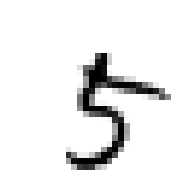

In [40]:
x.show()
print(y)

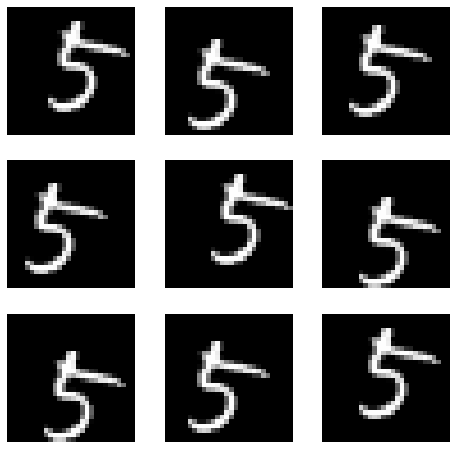

In [41]:
def _plot(i, j, ax): data.train_ds[0][0].show(ax, cmap="gray")
plot_multi(_plot, 3, 3, figsize=(8,8))

In [42]:
xb, yb = data.one_batch()
xb.shape, yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

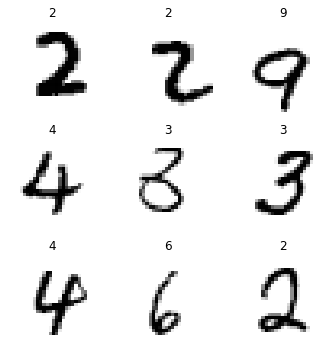

In [43]:
data.show_batch(rows=3, figsize=(5,5))

## Basic CNN with BatchNorm 

In [44]:
def conv(ni, nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [48]:
model = nn.Sequential(
    conv(1, 8), # 28x28 -> 14x14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 14x14 -> 7x7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 7x7 -> 4x4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 4x4 -> 2x2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 2x2 -> 1x1
    nn.BatchNorm2d(10),
    Flatten() # remove (1,1) grid
    )

In [49]:
learn = Learner(data, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)

In [50]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
___________________________________________________

In [51]:
xb = xb.cuda()

In [53]:
xb.shape

torch.Size([128, 1, 28, 28])

In [54]:
model(xb).shape

torch.Size([128, 10])

In [55]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


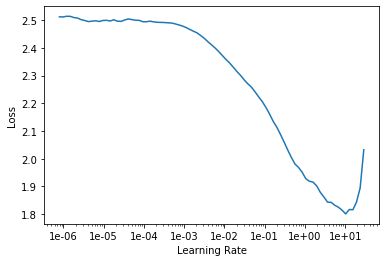

In [57]:
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(3, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.231718,0.169144,0.945600,00:09
1,0.134631,0.102725,0.967000,00:09
2,0.074702,0.044299,0.986100,00:08


## Refactor 

In [59]:
def conv2(ni, nf): return conv_layer(ni, nf, stride=2)

In [60]:
model = nn.Sequential(
    conv2(1, 8),
    conv2(8, 16),
    conv2(16, 32),
    conv2(32, 16),
    conv(16, 10),
    Flatten()
)

In [61]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [63]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          72         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [16, 7, 7]           1,152      True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
Conv2d               [32, 4, 4]           4,608      True      
___________________________________________________

In [64]:
learn.fit_one_cycle(10, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.227758,0.197133,0.940100,00:08
1,0.213179,0.280059,0.916700,00:08
2,0.182239,0.152112,0.954800,00:09
3,0.169531,0.105102,0.966300,00:08
4,0.130871,0.095260,0.969200,00:08
5,0.109435,0.064095,0.978800,00:09
6,0.095841,0.053984,0.982600,00:10
7,0.059901,0.041566,0.985900,00:09
8,0.049301,0.028563,0.990100,00:08
9,0.041770,0.026980,0.990200,00:09


## Resnet-ish 

In [65]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf, nf)
        self.conv2 = conv_layer(nf, nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

In [67]:
doc(res_block)

In [69]:
model = nn.Sequential(
    conv2(1, 8),
    res_block(8),
    conv2(8, 16),
    res_block(16),
    conv2(16, 32),
    res_block(32),
    conv2(32, 16),
    res_block(16),
    conv(16, 10),
    Flatten()
)

In [70]:
def conv_and_res(ni, nf): return nn.Sequential(conv2(ni, nf), res_block(nf))

In [71]:
model = nn.Sequential(
    conv_and_res(1, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, 10),
    Flatten()
)

In [72]:
learn = Learner(data, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


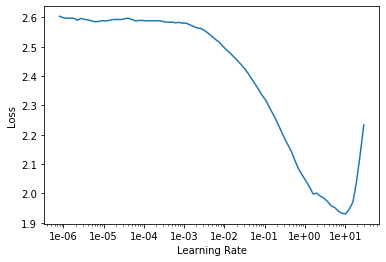

In [75]:
learn.lr_find(end_lr=100)
learn.recorder.plot()

In [76]:
learn.fit_one_cycle(12, max_lr=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.223794,0.183972,0.947300,00:12
1,0.131560,0.085055,0.971000,00:12
2,0.105475,0.172117,0.947500,00:12
3,0.084396,0.110071,0.965600,00:12
4,0.073484,0.066859,0.980300,00:13
5,0.076257,0.077188,0.975100,00:12
6,0.055828,0.029641,0.991900,00:13
7,0.041543,0.022208,0.991900,00:13
8,0.037409,0.025649,0.992100,00:13
9,0.027964,0.017920,0.994300,00:13


In [77]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          72         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
___________________________________________________